# imports

In [194]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [195]:
data=pd.read_csv(r'C:\Users\brainiac Abhinav\Desktop\Datasets\Titanic\titanic_train.csv')

In [196]:
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


# Exploratory data analysis

In [197]:
data.shape

(850, 15)

In [198]:
data.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [199]:
data.dtypes

passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
boat             object
body            float64
home.dest        object
survived          int64
dtype: object

<AxesSubplot:>

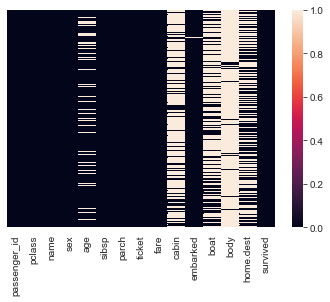

In [200]:
#heatmap of missinf values
sns.heatmap(data.isnull(),yticklabels=False)

<AxesSubplot:xlabel='survived', ylabel='count'>

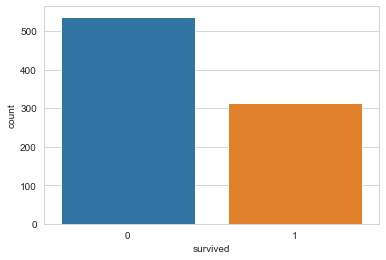

In [201]:
sns.countplot(x='survived',data=data)

<AxesSubplot:xlabel='survived', ylabel='count'>

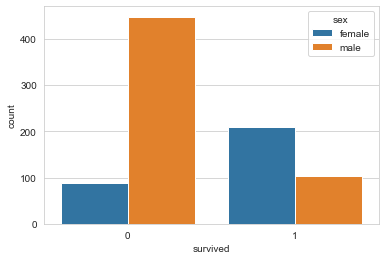

In [202]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=data)

<AxesSubplot:xlabel='survived', ylabel='count'>

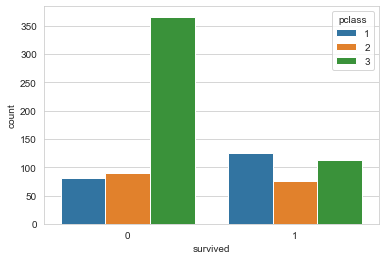

In [203]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=data)

<AxesSubplot:>

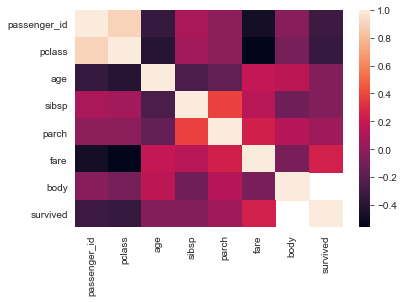

In [204]:
sns.heatmap(data=data.corr())

C:\Users\brainiac Abhinav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

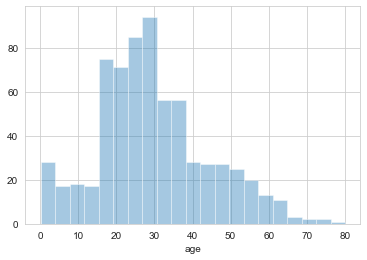

In [205]:
sns.distplot(data['age'].dropna(),kde=False)

<AxesSubplot:xlabel='fare'>

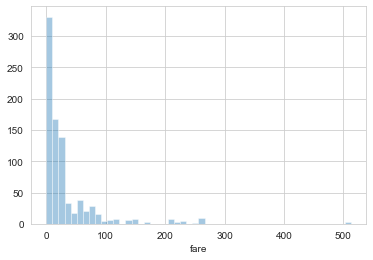

In [206]:
sns.distplot(data['fare'].dropna(),kde=False)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

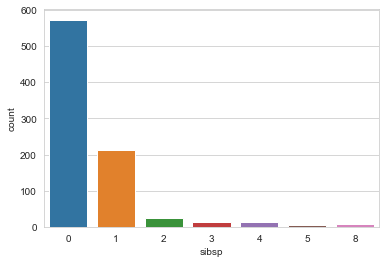

In [207]:
sns.countplot(x='sibsp',data=data)

C:\Users\brainiac Abhinav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare'>

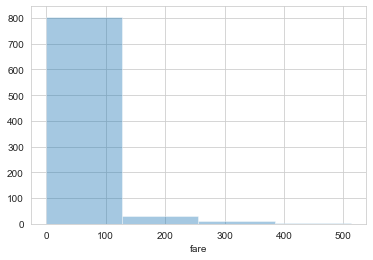

In [208]:
sns.distplot(data['fare'],kde=False,bins=4)

# Data Cleaning

<AxesSubplot:xlabel='pclass', ylabel='age'>

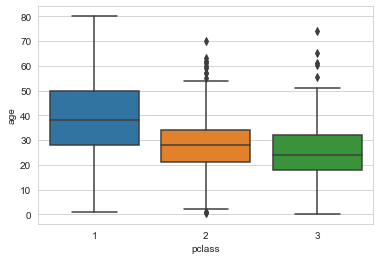

In [209]:
#removing null values
sns.boxplot(x='pclass',y='age',data=data)

<AxesSubplot:xlabel='sex', ylabel='age'>

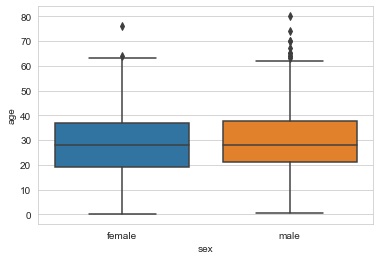

In [210]:
sns.boxplot(x='sex',y='age',data=data)

In [211]:
#removing null values
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 28
        else :
            return 25
    else :
       return age 

In [212]:
data['age']=data[['age','pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

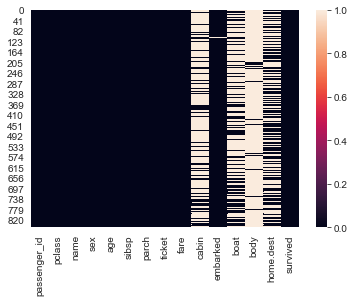

In [213]:
sns.heatmap(data.isnull())

In [214]:
data.drop(labels=['cabin','boat','body','home.dest'],axis=1,inplace=True)

<AxesSubplot:>

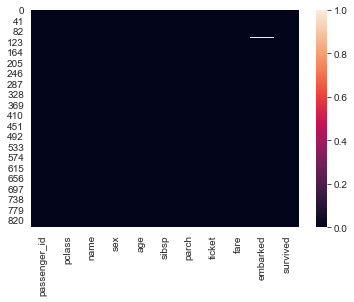

In [215]:
sns.heatmap(data.isnull())

In [216]:
data['embarked'].value_counts()


S    589
C    176
Q     84
Name: embarked, dtype: int64

In [217]:
def impute_em(embarked):
  if pd.isnull(embarked):
    return 'S'
  else :
    return embarked

In [218]:
data['embarked']=data['embarked'].apply(impute_em)

In [219]:
def impute_fare(fare):
  if pd.isnull(fare):
    return 34
  else :
        return fare

In [220]:
data['fare']=data['fare'].apply(impute_fare)

<AxesSubplot:>

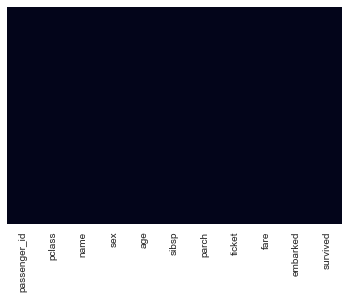

In [221]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

# Converting Catagorical values

In [222]:
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,25.0,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0


In [223]:
data.dtypes

passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
embarked         object
survived          int64
dtype: object

In [224]:
data=data.drop(labels=['passenger_id','name','ticket'],axis=1)

In [225]:
data.dtypes

pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
survived      int64
dtype: object

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    850 non-null    int64  
 1   sex       850 non-null    object 
 2   age       850 non-null    float64
 3   sibsp     850 non-null    int64  
 4   parch     850 non-null    int64  
 5   fare      850 non-null    float64
 6   embarked  850 non-null    object 
 7   survived  850 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 53.2+ KB


In [227]:
data.describe()

,pclass,age,sibsp,parch,fare,survived
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.32000,28.940490,0.522353,0.382353,34.012686,0.368235
std,0.83853,13.158876,1.112132,0.879511,53.674141,0.482610
min,1.00000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.00000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.00000,25.000000,0.000000,0.000000,14.108300,0.000000
75%,3.00000,36.000000,1.000000,0.000000,31.000000,1.000000
max,3.00000,80.000000,8.000000,9.000000,512.329200,1.000000


In [228]:
from sklearn import preprocessing

In [229]:
label_encoder=preprocessing.LabelEncoder()
data['sex']=label_encoder.fit_transform(data['sex'])
data['embarked']=label_encoder.fit_transform(data['embarked'])

In [230]:
data.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,0,25.0,0,0,7.7333,1,1
1,3,1,38.0,0,0,8.6625,2,0
2,3,0,30.0,1,1,24.1500,2,0
3,2,0,54.0,1,3,23.0000,2,1
4,2,1,40.0,0,0,13.0000,2,0


In [231]:
data['embarked'].unique()

array([1, 2, 0])

In [232]:
data.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

In [233]:
data

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,0,25.0,0,0,7.7333,1,1
1,3,1,38.0,0,0,8.6625,2,0
2,3,0,30.0,1,1,24.1500,2,0
3,2,0,54.0,1,3,23.0000,2,1
4,2,1,40.0,0,0,13.0000,2,0
...,...,...,...,...,...,...,...,...
845,1,1,55.0,0,0,50.0000,2,0
846,1,1,58.0,0,0,29.7000,0,0
847,2,0,24.0,1,0,26.0000,2,1
848,3,0,3.0,1,1,13.7750,2,0


In [234]:
x_train=data.iloc[:,:-1]

In [235]:
x_train

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,0,25.0,0,0,7.7333,1
1,3,1,38.0,0,0,8.6625,2
2,3,0,30.0,1,1,24.1500,2
3,2,0,54.0,1,3,23.0000,2
4,2,1,40.0,0,0,13.0000,2
...,...,...,...,...,...,...,...
845,1,1,55.0,0,0,50.0000,2
846,1,1,58.0,0,0,29.7000,0
847,2,0,24.0,1,0,26.0000,2
848,3,0,3.0,1,1,13.7750,2


In [236]:
y_train=data['survived']
y_train

0      1
1      0
2      0
3      1
4      0
      ..
845    0
846    0
847    1
848    0
849    0
Name: survived, Length: 850, dtype: int64

In [237]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.3,random_state=42)

# Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [241]:
predictions = logreg.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [242]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,predictions)
accuracy

0.7764705882352941

In [243]:
from sklearn.metrics import confusion_matrix
c_accuracy=confusion_matrix(Y_test,predictions)
c_accuracy

array([[132,  25],
       [ 32,  66]], dtype=int64)

# Decision Tree Classification

In [244]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [250]:
pred=classifier.predict(X_test)

In [251]:
pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [253]:
accuracy1=accuracy_score(pred,Y_test)
accuracy1

0.7725490196078432

# Support Vector Machine

In [254]:
from sklearn import svm

In [269]:
svector=svm.SVC(kernel='linear')
svector.fit(X_train,Y_train)

SVC(kernel='linear')

In [270]:
pred1=svector.predict(X_test)
pred1

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [271]:
accuracy2=accuracy_score(pred1,Y_test)
accuracy2

0.7529411764705882

In [273]:
matrix=confusion_matrix(pred1,Y_test)
matrix

array([[128,  34],
       [ 29,  64]], dtype=int64)